In [42]:
## Cell to read in graph data and import graph functions 

%matplotlib inline

import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import matplotlib

data = '/Users/annechen/Downloads/CRISPR Pools Data/results/graphable_data.csv'

graph_data = pd.read_csv(data, sep='\t')
graph_data

,Sample ID,Total Reads,Discordant,Single match,No match,Concordant,"JH441, JH471","JH442, JH472","JH443, JH473","JH444, JH474",...,"JH461, JH491","JH462, JH492","JH463, JH493","JH464, JH494","JH465, JH495","JH466, JH496","JH467, JH497","JH468, JH498","JH469, JH499","JH470, JH500"
0,1-1,53779,36,8950,38261,6532,0.0,0.0,0.0,13.0,...,53.0,0.0,0.0,0.0,0.0,400.0,2.0,188.0,47.0,4.0
1,1-2,26198,12,5738,14815,5633,0.0,0.0,0.0,7.0,...,62.0,0.0,0.0,1.0,0.0,365.0,4.0,124.0,29.0,8.0
2,1-3,25939,14,6083,14706,5136,0.0,0.0,0.0,7.0,...,70.0,0.0,0.0,0.0,0.0,204.0,2.0,52.0,7.0,2.0
3,1-4,26570,39,4288,18921,3322,0.0,0.0,0.0,7.0,...,23.0,0.0,0.0,1.0,0.0,169.0,3.0,60.0,29.0,1.0
4,1-5,30561,19,4815,21932,3795,0.0,0.0,0.0,6.0,...,18.0,0.0,0.0,1.0,0.0,171.0,0.0,40.0,10.0,3.0
5,1-6,22248,20,6872,9429,5927,0.0,0.0,0.0,8.0,...,43.0,0.0,0.0,1.0,0.0,437.0,3.0,84.0,12.0,1.0
6,2-10,24049,28,7092,10110,6819,0.0,0.0,0.0,10.0,...,93.0,0.0,0.0,4.0,0.0,905.0,2.0,69.0,35.0,8.0
7,2-11,16831,14,4228,8708,3881,0.0,0.0,0.0,14.0,...,43.0,0.0,0.0,0.0,0.0,648.0,0.0,66.0,24.0,10.0
8,2-12,43016,28,9071,27866,6051,0.0,0.0,0.0,9.0,...,58.0,0.0,0.0,5.0,0.0,609.0,0.0,41.0,14.0,12.0
9,2-13,16683,37,5222,5785,5639,0.0,0.0,0.0,17.0,...,67.0,0.0,0.0,2.0,0.0,1064.0,2.0,99.0,64.0,12.0


Text(0,0.5,'# of Reads')

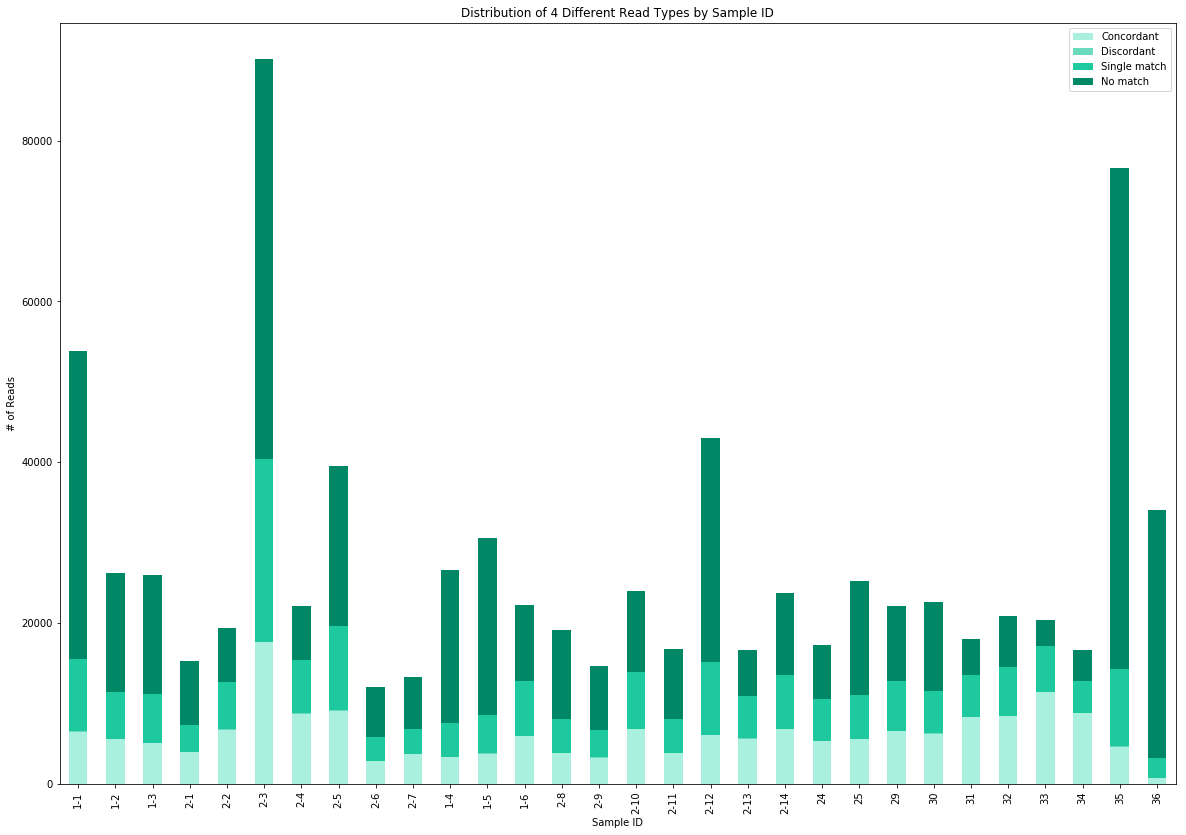

In [63]:
## Graph of total number of concordant, discordant, single match, no match reads

colors = ["#aaf0de", "#6bdbbf", '#1ec99f', '#008766']
x_axis = ['1-1','1-2','1-3','2-1','2-2','2-3','2-4','2-5','2-6','2-7','1-4','1-5','1-6','2-8','2-9','2-10','2-11','2-12',
         '2-13','2-14','24','25','29','30','31','32','33','34','35','36']
mod_graph_data = graph_data.set_index('Sample ID')
mod_graph_data.loc[x_axis,['Concordant', 'Discordant', 'Single match', 'No match']].plot.bar(stacked=True, color=colors, figsize=(20,14))
plt.title('Distribution of 4 Different Read Types by Sample ID')
plt.ylabel('# of Reads')


Text(0,0.5,'% of Total Reads')

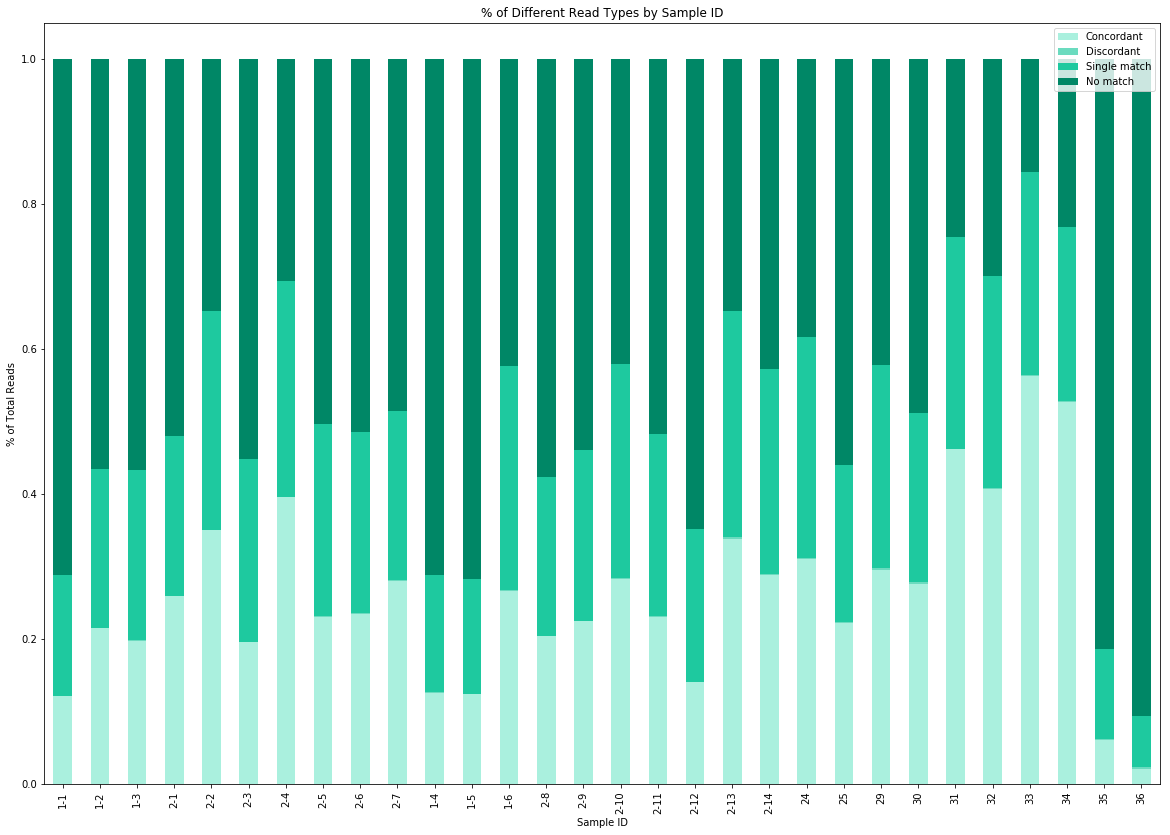

In [62]:
## Graph of percent of concordant, discordant, single match, no match reads out of total per sample read
from __future__ import division

mod = graph_data[['Sample ID','Total Reads','Discordant', 'Concordant', 'Single match', 'No match']].copy()
for index, row in mod.iterrows():
    mod.iloc[index, 2] = mod.iloc[index, 2]/mod.iloc[index, 1]
    mod.iloc[index, 3] = mod.iloc[index, 3]/mod.iloc[index, 1]
    mod.iloc[index, 4] = mod.iloc[index, 4]/mod.iloc[index, 1]
    mod.iloc[index, 5] = mod.iloc[index, 5]/mod.iloc[index, 1]

colors = ["#aaf0de", "#6bdbbf", '#1ec99f', '#008766']


mod = mod.set_index('Sample ID')
x_axis = ['1-1','1-2','1-3','2-1','2-2','2-3','2-4','2-5','2-6','2-7','1-4','1-5','1-6','2-8','2-9','2-10','2-11','2-12',
         '2-13','2-14','24','25','29','30','31','32','33','34','35','36']
mod.loc[x_axis,['Concordant', 'Discordant', 'Single match', 'No match']].plot.bar(stacked=True, color=colors, figsize=(20,14))
plt.title('% of Different Read Types by Sample ID')
plt.ylabel('% of Total Reads')

In [80]:
mod = graph_data.drop(['Total Reads', 'Discordant', 'Single match', 'No match', 'Concordant'], axis=1).copy()
mod = mod.set_index('Sample ID')
mod = mod.transpose()

from colour import Color
blue = Color("blue")
colors = list(blue.range_to(Color("green"),30))


mod.loc[:,:].plot.bar(stacked=True, color=colors, figsize=(20,14))
plt.title('Frequency of Reads')
plt.ylabel('# of Reads')
plt.xlabel('Primer Pairs')


SyntaxError: invalid syntax (<ipython-input-80-bc01a4d19014>, line 9)